In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Google Trends Adidas (last 5 years):

In [2]:
#Importing google trends csv and dropping first row: 'Categoría: Todas las categorías'
google_trends_adidas = pd.read_csv("Data/google_trends_adidas_5lastyears.csv", skiprows=2)
google_trends_adidas.head()

,Semana,adidas: (Todo el mundo)
0,2015-08-02,53
1,2015-08-09,54
2,2015-08-16,59
3,2015-08-23,58
4,2015-08-30,58


In [3]:
google_trends_adidas.columns

Index(['Semana', 'adidas: (Todo el mundo)'], dtype='object')

In [8]:
#Renaming columns
google_trends_adidas.rename(columns = {'Semana':'Date', 'adidas: (Todo el mundo)': 'Google trends Adidas'}, inplace=True)
google_trends_adidas.head()

,Date,Google trends Adidas
0,2015-08-02,53
1,2015-08-09,54
2,2015-08-16,59
3,2015-08-23,58
4,2015-08-30,58


In [9]:
£

,Date,Google trends Adidas
0,2015-08-02,53
1,2015-08-09,54
2,2015-08-16,59
3,2015-08-23,58
4,2015-08-30,58
...,...,...
255,2020-06-21,60
256,2020-06-28,60
257,2020-07-05,58
258,2020-07-12,60


In [10]:
google_trends_adidas2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  260 non-null    object
 1   Google trends Adidas  260 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.2+ KB


### Dataset stock market Adidas (last 5 years):

In [13]:
stockmarket_adidas = pd.read_csv("Data/stock_market_adidas_last5years.csv")
stockmarket_adidas

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jul 19, 2020",239.10,238.00,249.50,235.00,2.25M,0.55%
1,"Jul 12, 2020",237.80,239.60,244.10,232.50,2.75M,0.93%
2,"Jul 05, 2020",235.60,247.90,249.10,231.70,2.77M,-2.40%
3,"Jun 28, 2020",241.40,231.90,246.00,228.80,3.24M,3.61%
4,"Jun 21, 2020",233.00,235.00,245.00,232.00,3.09M,-1.94%
...,...,...,...,...,...,...,...
255,"Aug 30, 2015",65.18,66.67,67.70,64.65,4.17M,-2.70%
256,"Aug 23, 2015",66.99,63.69,67.55,62.51,7.63M,2.31%
257,"Aug 16, 2015",65.48,69.31,69.60,65.21,5.28M,-4.95%
258,"Aug 09, 2015",68.89,73.78,74.26,68.30,4.71M,-6.25%


In [18]:
#Deleting string 'M' from 'Vol.' column
stockmarket_adidas['Vol.'] = stockmarket_adidas['Vol.'].str.replace(r"M","")
stockmarket_adidas['Vol.'] = stockmarket_adidas['Vol.'].str.replace(r"K","")

In [19]:
#Convert the strings in 'Vol.' to integers
stockmarket_adidas['Vol.'] = pd.to_numeric(stockmarket_adidas['Vol.'])

In [20]:
stockmarket_adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      260 non-null    object 
 1   Price     260 non-null    float64
 2   Open      260 non-null    float64
 3   High      260 non-null    float64
 4   Low       260 non-null    float64
 5   Vol.      260 non-null    float64
 6   Change %  260 non-null    object 
dtypes: float64(5), object(2)
memory usage: 14.3+ KB


### Merge:

In [21]:
#Need same date format in both datasets
google_trends_adidas['Date'] = pd.to_datetime(google_trends_adidas['Date'])
google_trends_adidas.head()

,Date,Google trends Adidas
0,2015-08-02,53
1,2015-08-09,54
2,2015-08-16,59
3,2015-08-23,58
4,2015-08-30,58


In [22]:
stockmarket_adidas['Date'] = pd.to_datetime(stockmarket_adidas['Date'])

In [23]:
#Changing the order of 'Date' column to have same order as in google_trends_adidas 'Date'
stock_market_adidas = stockmarket_adidas.sort_values('Date',ascending=True)
stock_market_adidas.head()

,Date,Price,Open,High,Low,Vol.,Change %
259,2015-08-02,73.48,74.47,76.41,73.11,4.23,-1.33%
258,2015-08-09,68.89,73.78,74.26,68.30,4.71,-6.25%
257,2015-08-16,65.48,69.31,69.60,65.21,5.28,-4.95%
256,2015-08-23,66.99,63.69,67.55,62.51,7.63,2.31%
255,2015-08-30,65.18,66.67,67.70,64.65,4.17,-2.70%


In [24]:
#Merge
adidas = pd.merge(google_trends_adidas, stock_market_adidas, on='Date')
adidas

,Date,Google trends Adidas,Price,Open,High,Low,Vol.,Change %
0,2015-08-02,53,73.48,74.47,76.41,73.11,4.23,-1.33%
1,2015-08-09,54,68.89,73.78,74.26,68.30,4.71,-6.25%
2,2015-08-16,59,65.48,69.31,69.60,65.21,5.28,-4.95%
3,2015-08-23,58,66.99,63.69,67.55,62.51,7.63,2.31%
4,2015-08-30,58,65.18,66.67,67.70,64.65,4.17,-2.70%
...,...,...,...,...,...,...,...,...
255,2020-06-21,60,233.00,235.00,245.00,232.00,3.09,-1.94%
256,2020-06-28,60,241.40,231.90,246.00,228.80,3.24,3.61%
257,2020-07-05,58,235.60,247.90,249.10,231.70,2.77,-2.40%
258,2020-07-12,60,237.80,239.60,244.10,232.50,2.75,0.93%


In [25]:
#Exporting Adidas dataset
adidas.to_csv("Data/adidas_clean_dataset.csv")

In [27]:
adidas.describe()

,Google trends Adidas,Price,Open,High,Low,Vol.
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,66.553846,184.253231,183.511923,188.895154,178.667808,6.523731
std,7.792741,59.484786,59.621115,60.982520,57.898865,41.748810
min,40.000000,65.180000,63.690000,67.550000,62.510000,1.090000
25%,62.000000,147.712500,147.450000,151.225000,143.950000,2.800000
50%,67.000000,188.150000,186.525000,191.925000,181.375000,3.480000
75%,71.000000,212.725000,211.750000,218.100000,206.875000,4.552500
max,100.000000,313.000000,311.600000,317.450000,308.200000,676.430000


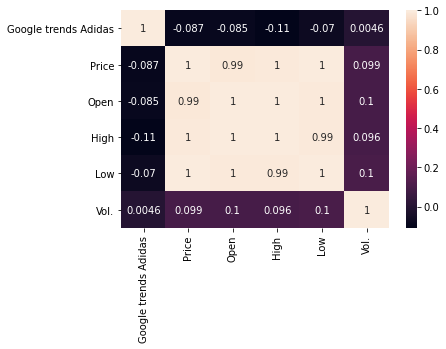

In [29]:
corrMatrix = adidas.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

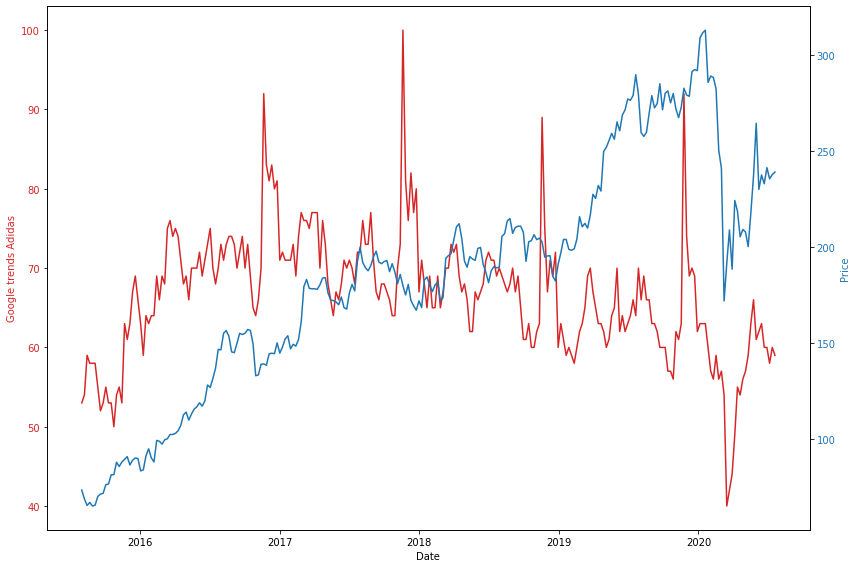

In [30]:
fig, ax1 = plt.subplots(figsize=(12,8))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Google trends Adidas', color=color)
ax1.plot(adidas['Date'], adidas['Google trends Adidas'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Price', color=color)
ax2.plot(adidas['Date'], adidas['Price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

### Beyonce collaboration:

In [103]:
#Importing Google trends 'Beyonce' csv from 2019
beyonce = pd.read_csv("Data/google_trends_beyonce_2019.csv", skiprows=2)

In [104]:
beyonce.columns

Index(['Semana', 'beyonce: (Todo el mundo)'], dtype='object')

In [105]:
#Renaming columns
beyonce.rename(columns = {'Semana':'Date', 
                                   'beyonce: (Todo el mundo)': 'Beyonce Adidas'}, inplace=True)
beyonce.columns

Index(['Date', 'Beyonce Adidas'], dtype='object')

In [106]:
#Need same date format in both datasets
beyonce['Date'] = pd.to_datetime(beyonce['Date'])
beyonce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            52 non-null     datetime64[ns]
 1   Beyonce Adidas  52 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 960.0 bytes


In [107]:
#Importing stock market from 2019
stock_market_adidas_2019 = pd.read_csv("Data/stock_market_adidas_2019.csv")
stock_market_adidas_2019.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Dec 29, 2019",290.05,291.52,293.20,288.7,-,-0.72%
1,"Dec 22, 2019",292.15,291.30,294.90,290.7,-,0.29%
2,"Dec 15, 2019",291.30,280.00,292.00,278.6,-,4.74%
3,"Dec 08, 2019",278.12,278.55,282.60,269.2,-,-0.52%
4,"Dec 01, 2019",279.57,283.60,288.25,274.1,-,-1.47%


In [108]:
stock_market_adidas_2019['Date'] = pd.to_datetime(stock_market_adidas_2019['Date'])
stock_market_adidas_2019.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2019-12-29,290.05,291.52,293.20,288.7,-,-0.72%
1,2019-12-22,292.15,291.30,294.90,290.7,-,0.29%
2,2019-12-15,291.30,280.00,292.00,278.6,-,4.74%
3,2019-12-08,278.12,278.55,282.60,269.2,-,-0.52%
4,2019-12-01,279.57,283.60,288.25,274.1,-,-1.47%


In [109]:
#Changing the order of 'Date' column
stock_market_adidas_2019 = stock_market_adidas_2019.sort_values('Date',ascending=True)
stock_market_adidas_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 51 to 0
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      52 non-null     datetime64[ns]
 1   Price     52 non-null     float64       
 2   Open      52 non-null     float64       
 3   High      52 non-null     float64       
 4   Low       52 non-null     float64       
 5   Vol.      52 non-null     object        
 6   Change %  52 non-null     object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 3.2+ KB


In [110]:
adidas_2019 = pd.merge(beyonce, stock_market_adidas_2019, on='Date')
adidas_2019.head()

,Date,Beyonce Adidas,Price,Open,High,Low,Vol.,Change %
0,2019-01-06,36,196.43,189.46,198.15,189.25,-,3.17%
1,2019-01-13,31,203.10,195.00,205.00,195.00,-,3.40%
2,2019-01-20,30,203.95,203.50,208.29,200.20,-,0.42%
3,2019-01-27,33,199.07,203.50,207.40,197.66,-,-2.39%
4,2019-02-03,34,198.68,199.30,203.60,195.00,-,-0.20%


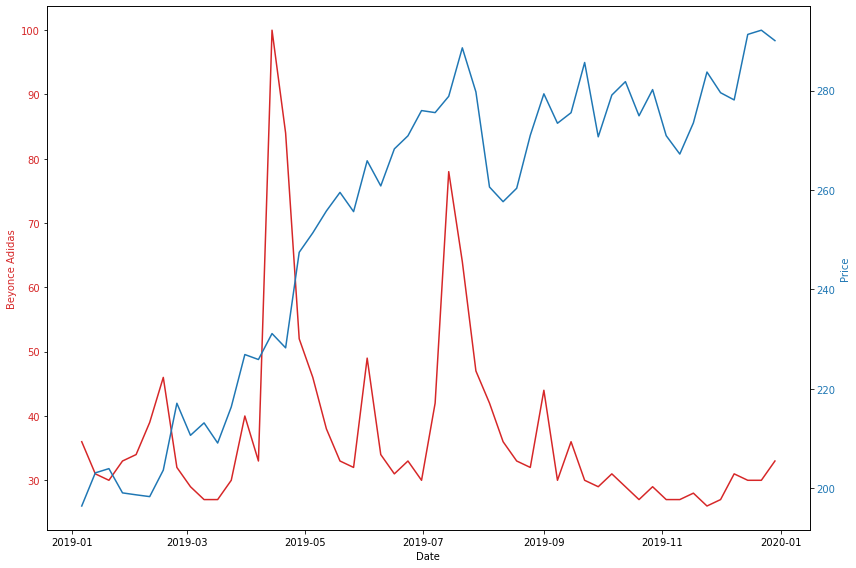

In [112]:
fig, ax1 = plt.subplots(figsize=(12,8))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Beyonce Adidas', color=color)
ax1.plot(adidas_2019['Date'], adidas_2019['Beyonce Adidas'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Price', color=color)
ax2.plot(adidas_2019['Date'], adidas_2019['Price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()
plt.show()

In [113]:
#Exporting dataset
adidas_2019.to_csv("Data/adidas_2019_clean_dataset.csv")

### Kaney West and Gap:

In [86]:
#Importing Google trends 'Kaney West' csv from 2020
kaney_west = pd.read_csv("Data/google_trends_kaney_west_2020.csv", skiprows=2)

In [87]:
kaney_west.columns

Index(['Semana', 'kaney west: (Todo el mundo)'], dtype='object')

In [88]:
#Renaming columns
kaney_west.rename(columns = {'Semana':'Date', 
                                   'kaney west: (Todo el mundo)': 'Kaney West Adidas'}, inplace=True)
kaney_west.columns

Index(['Date', 'Kaney West Adidas'], dtype='object')

In [89]:
#Need same date format in both datasets
kaney_west['Date'] = pd.to_datetime(kaney_west['Date'])
kaney_west.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               30 non-null     datetime64[ns]
 1   Kaney West Adidas  30 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 608.0 bytes


In [90]:
#Importing stock market from 2020
stock_market_adidas_2020 = pd.read_csv("Data/stock_market_adidas_2020.csv")

In [91]:
stock_market_adidas_2020['Date'] = pd.to_datetime(stock_market_adidas_2020['Date'])
stock_market_adidas_2020.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-07-26,243.70,238.9,245.0,234.8,-,1.86%
1,2020-07-19,239.25,238.5,249.2,235.6,-,1.10%
2,2020-07-12,236.65,239.6,243.9,232.6,-,0.45%
3,2020-07-05,235.60,247.9,248.9,232.0,-,-2.44%
4,2020-06-28,241.50,231.9,246.0,229.0,-,3.87%


In [92]:
#Changing the order of 'Date' column
stock_market_adidas_2020 = stock_market_adidas_2020.sort_values('Date',ascending=True)
stock_market_adidas_2020.head()

,Date,Price,Open,High,Low,Vol.,Change %
29,2020-01-05,310.35,289.02,311.69,285.45,-,7.00%
28,2020-01-12,310.90,310.77,317.35,308.38,-,0.18%
27,2020-01-19,314.23,311.85,316.17,306.32,-,1.07%
26,2020-01-26,286.35,307.65,313.00,286.00,-,-8.87%
25,2020-02-02,289.15,286.20,294.70,281.85,-,0.98%


In [93]:
adidas_2020 = pd.merge(kaney_west, stock_market_adidas_2020, on='Date')
adidas_2020.head()

,Date,Kaney West Adidas,Price,Open,High,Low,Vol.,Change %
0,2020-01-05,7,310.35,289.02,311.69,285.45,-,7.00%
1,2020-01-12,9,310.90,310.77,317.35,308.38,-,0.18%
2,2020-01-19,11,314.23,311.85,316.17,306.32,-,1.07%
3,2020-01-26,6,286.35,307.65,313.00,286.00,-,-8.87%
4,2020-02-02,15,289.15,286.20,294.70,281.85,-,0.98%


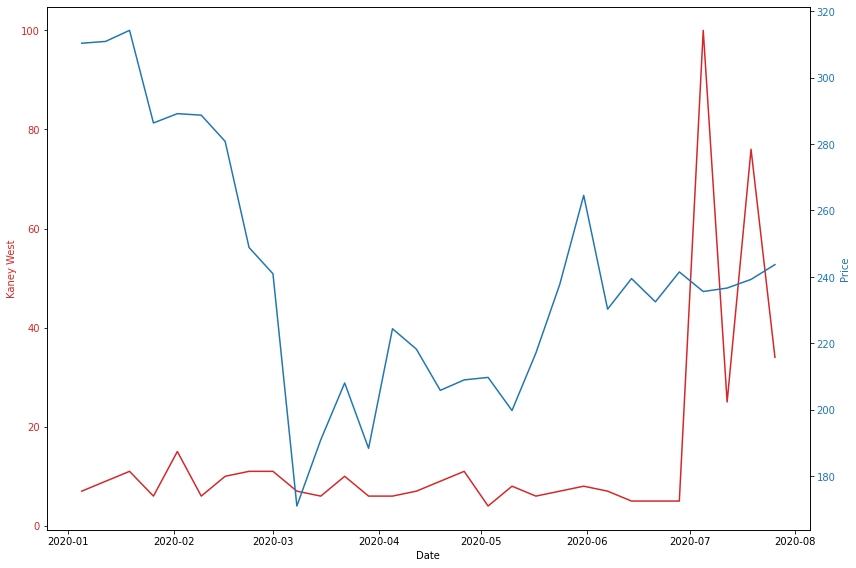

In [94]:
fig, ax1 = plt.subplots(figsize=(12,8))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Kaney West', color=color)
ax1.plot(adidas_2020['Date'], adidas_2020['Kaney West Adidas'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Price', color=color)
ax2.plot(adidas_2020['Date'], adidas_2020['Price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()
plt.show()

In [95]:
#Importing Gap's stock market from 2020
stock_market_gap_2020 = pd.read_csv("Data/stock_market_gap_2020.csv")

In [96]:
stock_market_gap_2020['Date'] = pd.to_datetime(stock_market_gap_2020['Date'])
stock_market_gap_2020.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-07-26,14.15,12.63,14.53,12.36,10.02M,12.12%
1,2020-07-19,12.62,12.64,13.33,11.92,52.34M,-2.09%
2,2020-07-12,12.89,11.66,13.26,10.81,68.13M,10.64%
3,2020-07-05,11.65,12.62,12.79,11.51,66.67M,-5.13%
4,2020-06-28,12.28,12.89,13.24,12.03,87.45M,1.74%


In [97]:
#Changing the order of 'Date' column
stock_market_gap_2020 = stock_market_gap_2020.sort_values('Date',ascending=True)
stock_market_gap_2020.head()

,Date,Price,Open,High,Low,Vol.,Change %
29,2020-01-05,17.80,17.34,18.50,17.20,31.75M,2.06%
28,2020-01-12,18.53,17.80,18.92,17.59,28.90M,4.10%
27,2020-01-19,17.66,18.53,18.53,17.47,18.21M,-4.70%
26,2020-01-26,17.41,17.34,18.48,17.16,23.60M,-1.42%
25,2020-02-02,17.85,17.45,18.99,17.23,23.28M,2.53%


In [98]:
gap_2020 = pd.merge(kaney_west, stock_market_gap_2020, on='Date')
gap_2020.head()

,Date,Kaney West Adidas,Price,Open,High,Low,Vol.,Change %
0,2020-01-05,7,17.80,17.34,18.50,17.20,31.75M,2.06%
1,2020-01-12,9,18.53,17.80,18.92,17.59,28.90M,4.10%
2,2020-01-19,11,17.66,18.53,18.53,17.47,18.21M,-4.70%
3,2020-01-26,6,17.41,17.34,18.48,17.16,23.60M,-1.42%
4,2020-02-02,15,17.85,17.45,18.99,17.23,23.28M,2.53%


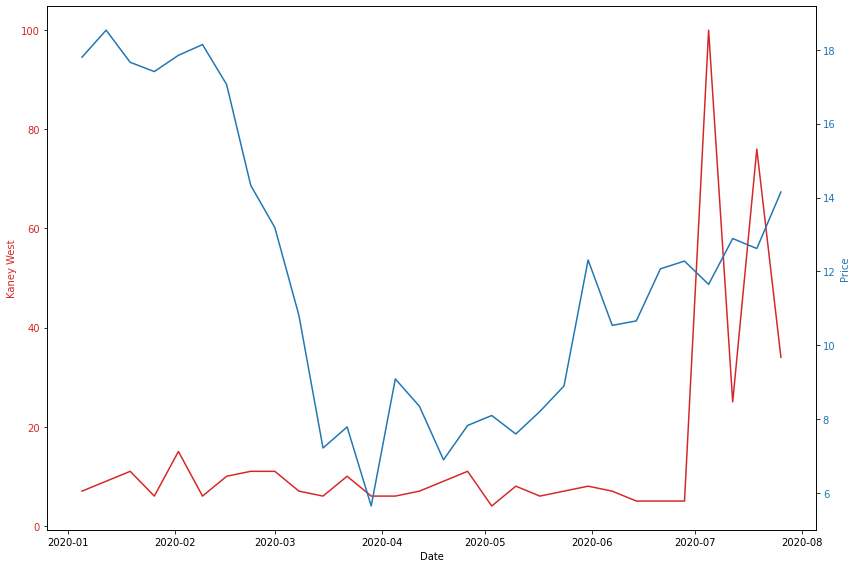

In [99]:
fig, ax1 = plt.subplots(figsize=(12,8))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Kaney West', color=color)
ax1.plot(gap_2020['Date'], gap_2020['Kaney West Adidas'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Price', color=color)
ax2.plot(gap_2020['Date'], gap_2020['Price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()
plt.show()

In [101]:
#Exporting dataset
gap_2020.to_csv("Data/gap_2020_clean_dataset.csv")